In [1]:
import pandas as pd
dataAfterCleaning = pd.read_csv('dataAfterCleaning.csv', header = None) #Eliminare timestamp
dataSetForLearning = pd.read_csv('dataSetForLearning.csv', header=None) #Eliminare persoane si datetime
dataPeople = pd.read_csv('dataPeople.csv', header=None) #Setul de date cu persoane in sala
dataPeopleNew = pd.read_csv('dataPeopleNew.csv', header=None) #Set nou de date cu persoane in sala pentru testarea cu setul nou de date
dataSetForLearningNew = pd.read_csv('dataSetForLearningNew.csv', header=None) #Nou set de date fara datetime si numarul de persoane pentru testarea cu setul nou de date


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Citirea datelor din fișierul CSV într-un DataFrame pandas

# Separarea caracteristicilor și variabilei de răspuns
X = dataSetForLearning  # Excludem primele două coloane (datetime și numărul de persoane în sală) pentru caracteristici
y = dataPeople   # Prima coloană (numărul de persoane în sală) este variabila de răspuns

# Inițierea unui model de regresie cu arbore de decizie
regressor = DecisionTreeRegressor(random_state=42)

# Antrenarea modelului pentru a calcula importanța caracteristicilor
regressor.fit(X, y)

# Extrage importanța caracteristicilor (indicele Gini) din model
importanta_caracteristici = regressor.feature_importances_

# Crearea unui DataFrame pentru a afișa importanța caracteristicilor
importanta_df = pd.DataFrame({'Caracteristica': X.columns, 'Importanta': importanta_caracteristici})

# Sortarea DataFrame după importanță pentru a vedea cele mai importante caracteristici
importanta_df = importanta_df.sort_values(by='Importanta', ascending=False)
print("0 -> Ziua saptamanii")
print("1 -> Daca este weekend")
print("2 -> Daca este vacanta")
print("3 -> Temperatura in fahrenheit")
print("4 -> Daca este inceput de semestru")
print("5 -> Daca este in timpul semestrului")
print("6 -> Luna")
print("7 -> Ora")
print(importanta_df)


0 -> Ziua saptamanii
1 -> Daca este weekend
2 -> Daca este vacanta
3 -> Temperatura in fahrenheit
4 -> Daca este inceput de semestru
5 -> Daca este in timpul semestrului
6 -> Luna
7 -> Ora
   Caracteristica  Importanta
7               7    0.526997
3               3    0.170225
5               5    0.113160
6               6    0.082710
0               0    0.068347
1               1    0.024706
4               4    0.013751
2               2    0.000105


In [3]:
import pandas as pd
import numpy as np

def entropy(data):
    # Calcularea frecvenței fiecărei valori în setul de date
    value_counts = data.value_counts(normalize=True)
    
    # Calcularea entropiei
    entropy = -np.sum(value_counts * np.log2(value_counts))
    
    return entropy


# Eliminați a doua coloană (coloana de dată)
dataL = dataAfterCleaning.drop(columns=[1])
print("0 -> Numarul de persoane")
print("2 -> Ziua saptamanii")
print("3 -> Daca este weekend")
print("4 ->  Daca este vacanta")
print("5 -> Temperatura in fahrenheit")
print("6 -> Daca este inceput de semestru")
print("7 -> Daca este in timpul semestrului")
print("8 -> Luna")
print("9 -> Ora")
# Iterați prin fiecare coloană și calculați entropia pentru fiecare
for col in dataAfterCleaning.columns:
    if col != 1:  # Excludem a doua coloană (coloana de dată)
        entropy_col = entropy(dataAfterCleaning[col])
        print("Entropia pentru coloana", col, ":", entropy_col)

0 -> Numarul de persoane
2 -> Ziua saptamanii
3 -> Daca este weekend
4 ->  Daca este vacanta
5 -> Temperatura in fahrenheit
6 -> Daca este inceput de semestru
7 -> Daca este in timpul semestrului
8 -> Luna
9 -> Ora
Entropia pentru coloana 0 : 5.901439467496326
Entropia pentru coloana 2 : 2.807200868488543
Entropia pentru coloana 3 : 0.8593322325429105
Entropia pentru coloana 4 : 0.025841155587878036
Entropia pentru coloana 5 : 10.188939566468964
Entropia pentru coloana 6 : 0.398045158259592
Entropia pentru coloana 7 : 0.9246098812508156
Entropia pentru coloana 8 : 3.516255476902493
Entropia pentru coloana 9 : 4.557969673123609


Scorul regresiei liniare: 0.5146683781981567
Eroarea absolută medie (MAE): 12.092154101958158
Eroarea medie pătratică (MSE): 250.8425322081968


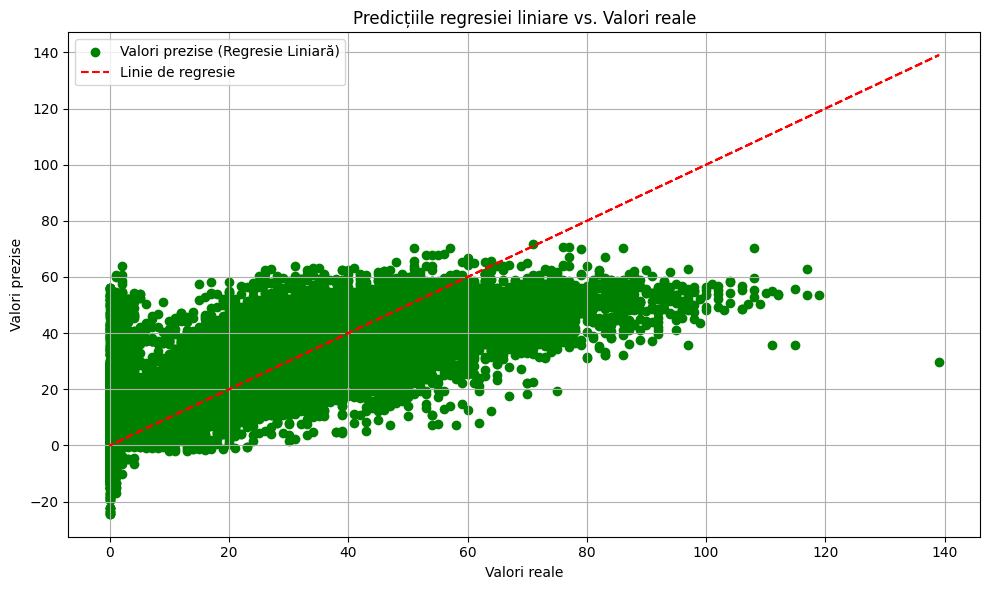

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt 



# Separarea caracteristicilor și variabilei de răspuns
X = dataSetForLearning  # Excludem primele două coloane (datetime și numărul de persoane în sală) pentru caracteristici
y = dataPeople  # Prima coloană (numărul de persoane în sală) este variabila de răspuns
y = y.values.ravel()

# Divizarea datelor în set de antrenament și set de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializarea și antrenarea modelului de regresie liniară
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluarea modelului pe setul de testare
score = model.score(X_test, y_test)
print("Scorul regresiei liniare:", score)


# Predicțiile făcute de modelul de regresie liniară
predictions_linear_regression = model.predict(X_test)

# Calcularea erorii absolute medii (MAE)
mae_ann = mean_absolute_error(y_test, predictions_linear_regression)
print("Eroarea absolută medie (MAE):", mae_ann)

# Calcularea erorii medie pătratice (MSE)
mse_ann = mean_squared_error(y_test, predictions_linear_regression)
print("Eroarea medie pătratică (MSE):", mse_ann) 

# Trasarea graficului
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_linear_regression, color='green', label='Valori prezise (Regresie Liniară)')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Linie de regresie')
plt.title('Predicțiile regresiei liniare vs. Valori reale')
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Scorul rețelei neurale pentru regresie: 0.6655257260355152
Eroarea absolută medie (MAE): 9.769925079653163
Eroarea medie pătratică (MSE): 172.8722590303529


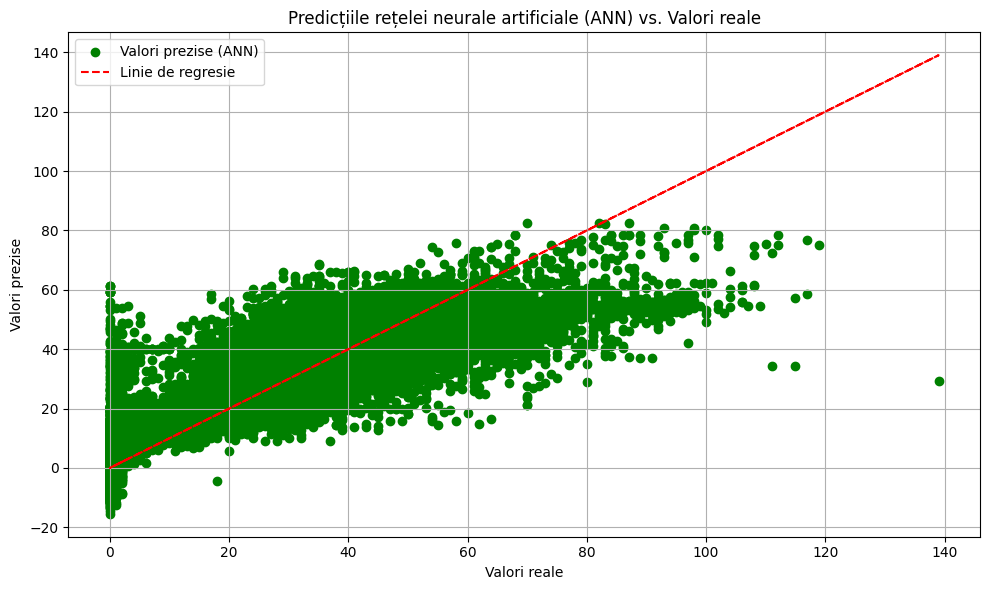

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
# Separarea caracteristicilor și variabilei de răspuns
X = dataSetForLearning  # Excludem primele două coloane (datetime și numărul de persoane în sală) pentru caracteristici
y = dataPeople   # Prima coloană (numărul de persoane în sală) este variabila de răspuns
y = y.values.ravel()
# Divizarea datelor în set de antrenament și set de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializarea și antrenarea modelului de rețea neurală pentru regresie
ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
ann_model.fit(X_train, y_train)

# Evaluarea modelului pe setul de testare
ann_score = ann_model.score(X_test, y_test)
print("Scorul rețelei neurale pentru regresie:", ann_score)

predictions_ann = ann_model.predict(X_test)

# Calcularea erorii absolute medii (MAE)
mae_ann = mean_absolute_error(y_test, predictions_ann)
print("Eroarea absolută medie (MAE):", mae_ann)

# Calcularea erorii medie pătratice (MSE)
mse_ann = mean_squared_error(y_test, predictions_ann)
print("Eroarea medie pătratică (MSE):", mse_ann) 

# Trasarea graficului
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_ann, color='green', label='Valori prezise (ANN)')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Linie de regresie')
plt.title('Predicțiile rețelei neurale artificiale (ANN) vs. Valori reale')
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Scorul Random Forest Regressor: 0.9246968136963647
Eroarea absolută medie (MAE) pentru Random Forest: 4.24002870549327
Eroarea medie pătratică (MSE) pentru Random Forest: 38.92027860377451


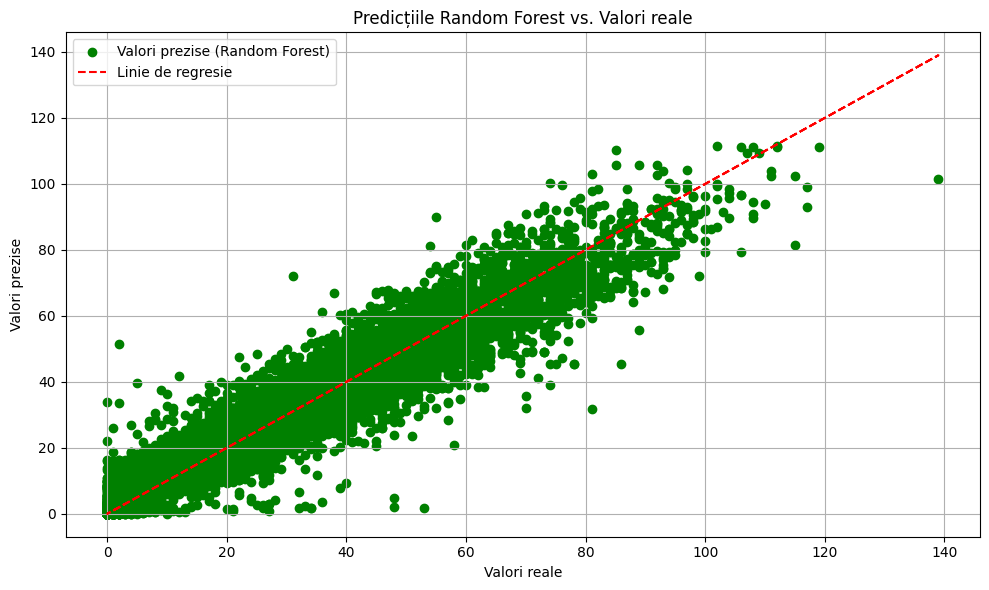

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Separarea caracteristicilor și variabilei de răspuns
X = dataSetForLearning  # Excludem primele două coloane (datetime și numărul de persoane în sală) pentru caracteristici
y = dataPeople   # Prima coloană (numărul de persoane în sală) este variabila de răspuns
y = y.values.ravel()

# Divizarea datelor în set de antrenament și set de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializarea și antrenarea modelului Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluarea modelului pe setul de testare
rf_score = rf_model.score(X_test, y_test)
print("Scorul Random Forest Regressor:", rf_score)

# Predicțiile făcute de model
predictions_rf = rf_model.predict(X_test)

# Calcularea erorii absolute medii (MAE)
mae_rf = mean_absolute_error(y_test, predictions_rf)
print("Eroarea absolută medie (MAE) pentru Random Forest:", mae_rf)

# Calcularea erorii medie pătratice (MSE)
mse_rf = mean_squared_error(y_test, predictions_rf)
print("Eroarea medie pătratică (MSE) pentru Random Forest:", mse_rf) 

# Trasarea graficului
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_rf, color='green', label='Valori prezise (Random Forest)')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Linie de regresie')
plt.title('Predicțiile Random Forest vs. Valori reale')
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Scorul Random Forest Regressor: 0.9262325188390267
Eroarea absolută medie (MAE) pentru Random Forest: 3.1429901896828123
Eroarea medie pătratică (MSE) pentru Random Forest: 17.343902492173083


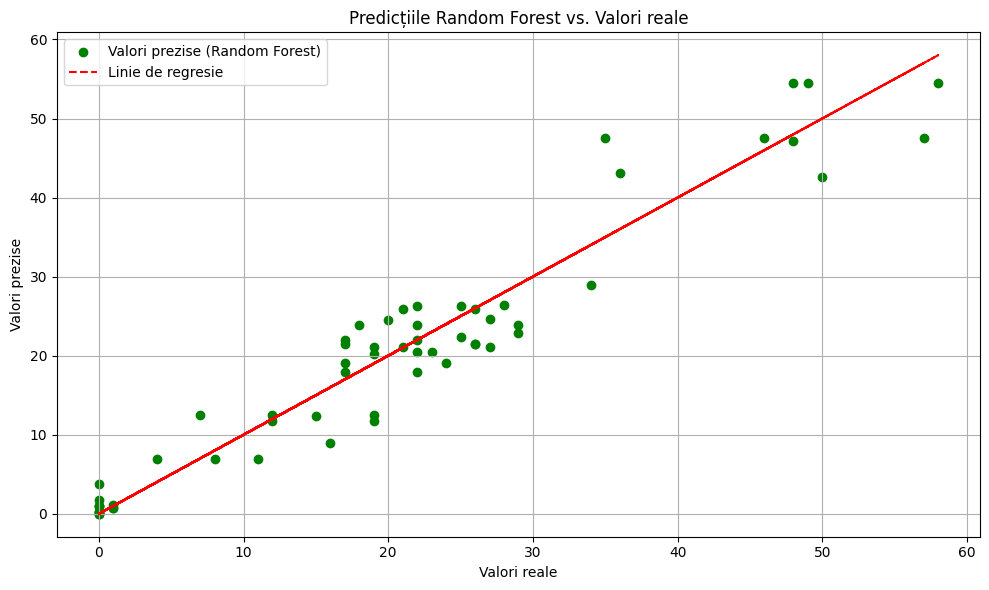

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Separarea caracteristicilor și variabilei de răspuns
X = dataSetForLearningNew # Excludem primele două coloane (datetime și numărul de persoane în sală) pentru caracteristici
y = dataPeopleNew   # Prima coloană (numărul de persoane în sală) este variabila de răspuns
y = y.values.ravel()

# Divizarea datelor în set de antrenament și set de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializarea și antrenarea modelului Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluarea modelului pe setul de testare
rf_score = rf_model.score(X_test, y_test)
print("Scorul Random Forest Regressor:", rf_score)

# Predicțiile făcute de model
predictions_rf = rf_model.predict(X_test)

# Calcularea erorii absolute medii (MAE)
mae_rf = mean_absolute_error(y_test, predictions_rf)
print("Eroarea absolută medie (MAE) pentru Random Forest:", mae_rf)

# Calcularea erorii medie pătratice (MSE)
mse_rf = mean_squared_error(y_test, predictions_rf)
print("Eroarea medie pătratică (MSE) pentru Random Forest:", mse_rf) 

# Trasarea graficului
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_rf, color='green', label='Valori prezise (Random Forest)')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Linie de regresie')
plt.title('Predicțiile Random Forest vs. Valori reale')
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
